In [62]:
import pandas as pd
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Grouper
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('Airlines+Data.xlsx',header=0,parse_dates=True)

In [3]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
data.shape

(96, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [8]:
data.set_index('Month',inplace=True)

In [9]:
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [10]:
data.shape

(96, 1)

In [11]:
data.isna().sum()

Passengers    0
dtype: int64

In [14]:
data.duplicated().unique()

array([False,  True])

In [16]:
data[data.duplicated()]

,Passengers
Month,
1995-08-01,148
1995-12-01,118
1996-04-01,135
1996-08-01,170
1997-06-01,178
1997-08-01,199
1998-11-01,172
1999-02-01,196
1999-11-01,180


In [17]:
data.drop_duplicates(inplace=True)

In [18]:
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


In [19]:
data.shape

(80, 1)

In [20]:
df=data.copy()

In [21]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


In [22]:
df.ndim

2

In [23]:
df.isna().sum()

Passengers    0
dtype: int64

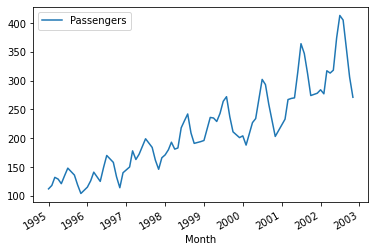

In [24]:
df.plot()
plt.show()

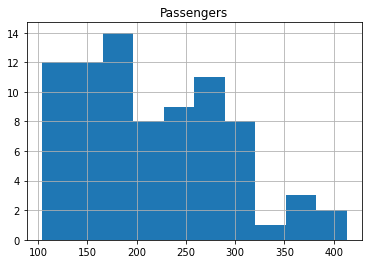

In [25]:
df.hist()
plt.show()

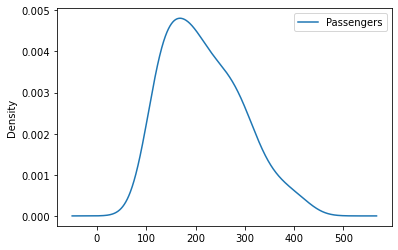

In [26]:
df.plot(kind='kde')
plt.show()

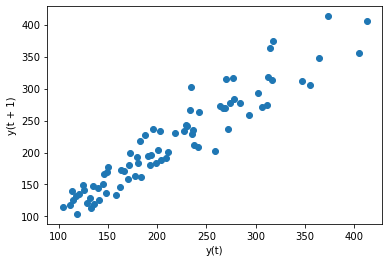

In [27]:
lag_plot(df)
plt.show()

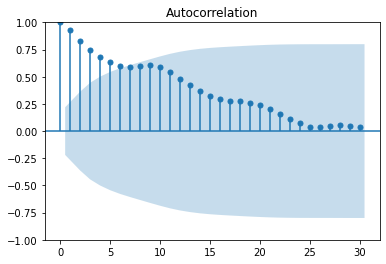

In [29]:
plot_acf(df,lags=30)
plt.show()

In [30]:
#unsampling

In [32]:
unsampled=df.resample('M').mean()

In [33]:
unsampled

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


In [35]:
interpolated=unsampled.interpolate(method='linear')

In [36]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


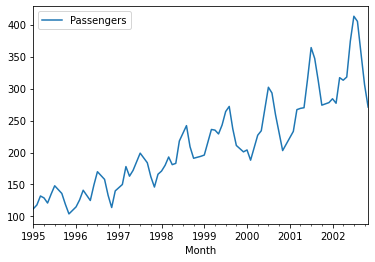

In [37]:
interpolated.plot()
plt.show()

In [38]:
#transformations

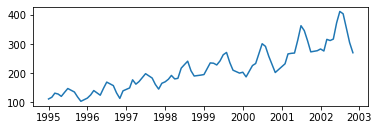

In [40]:
plt.subplot(211)
plt.plot(df)
plt.show()

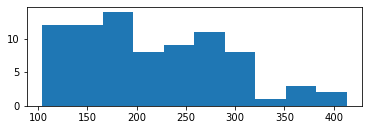

In [41]:
plt.subplot(212)
plt.hist(df)
plt.show()

In [42]:
#square root transform

In [43]:
dataframe=DataFrame(df.values)
dataframe.columns=['Passengers']
dataframe['Passengers']=sqrt(dataframe['Passengers'])

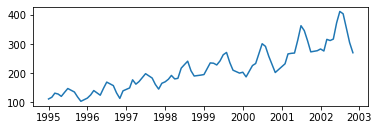

In [45]:
plt.subplot(211)
plt.plot(df['Passengers'])
plt.show()

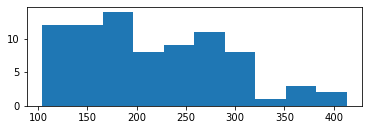

In [46]:
plt.subplot(212)
plt.hist(df['Passengers'])
plt.show()

In [47]:
#log transform

In [48]:
from numpy import log

In [49]:
dataframe = DataFrame(df.values)
dataframe.columns = ['Passengers']
dataframe['Passengers']=log(dataframe['Passengers'])

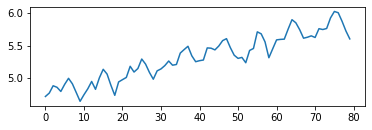

In [50]:
plt.subplot(211)
plt.plot(dataframe['Passengers'])
plt.show()

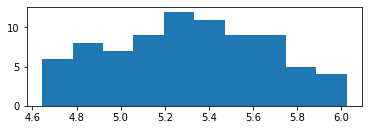

In [51]:
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [52]:
train=interpolated.head(81)
test=interpolated.tail(14)

In [53]:
#moving average

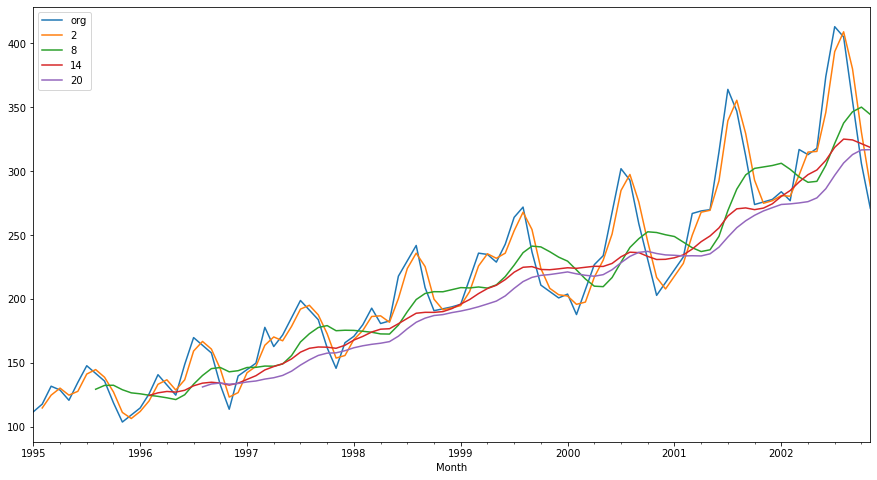

In [55]:
plt.figure(figsize=(15,8))
interpolated.Passengers.plot(label='org')
for i in range (2,24,6):
    interpolated['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

In [56]:
#time series decomposition plot

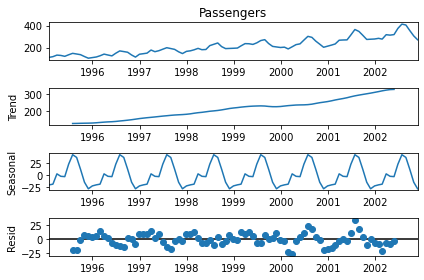

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add=seasonal_decompose(interpolated.Passengers)
decompose_ts_add.plot()
plt.show()

In [60]:
#ACF plots and PACF plots

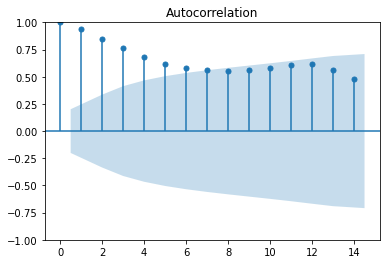

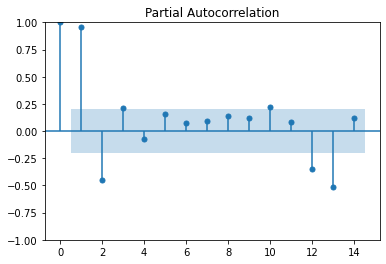

In [63]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(interpolated.Passengers,lags=14)
tsa_plots.plot_pacf(interpolated.Passengers,lags=14)
plt.show()

In [64]:
#Evaluation metric MAPE

In [68]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

In [69]:
#Simple exponential method

In [70]:
ses_model=SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Passengers)

11.181638722453021

In [71]:
#holt method

In [72]:
hw_model=Holt(train["Passengers"]).fit(smoothing_level=0.1,smoothing_slope=0.2)
pred_hw=hw_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw,test.Passengers)

12.424434193053463

In [73]:
#holts winter exponential smoothing with additiveseasonality and trend

In [81]:
hwe_model_add_add=ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add =hwe_model_add_add.predict(start=test.index[0],end =test.index[-1])
MAPE(pred_hwe_add_add,test.Passengers)

3.5137309781557966

In [82]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [83]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start =test.index[0],end =test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

3.2332650340344786

In [84]:
rmse_hwe_mul_add=sqrt(mean_squared_error(pred_hwe_mul_add,test.Passengers))
rmse_hwe_mul_add

12.63269019553182

In [85]:
#Final Model by combining train and test

In [86]:
hwe_model_add_add = ExponentialSmoothing(interpolated["Passengers"],seasonal="add",trend="add",seasonal_periods=10).fit()

In [87]:
hwe_model_add_add.forecast(10)

2002-12-31    276.163043
2003-01-31    284.538512
2003-02-28    286.268492
2003-03-31    292.141887
2003-04-30    292.961147
2003-05-31    292.684724
2003-06-30    289.181443
2003-07-31    287.512286
2003-08-31    289.678286
2003-09-30    288.962777
Freq: M, dtype: float64

In [88]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


In [89]:
interpolated.reset_index(inplace=True)

In [90]:
interpolated['t'] = 1

In [91]:
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,1
2,1995-03-31,132.0,1
3,1995-04-30,129.0,1
4,1995-05-31,121.0,1
...,...,...,...
90,2002-07-31,413.0,1
91,2002-08-31,405.0,1
92,2002-09-30,355.0,1
93,2002-10-31,306.0,1


In [92]:
for i,row in interpolated.iterrows():
  interpolated['t'].iloc[i] = i+1

In [93]:
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,2
2,1995-03-31,132.0,3
3,1995-04-30,129.0,4
4,1995-05-31,121.0,5
...,...,...,...
90,2002-07-31,413.0,91
91,2002-08-31,405.0,92
92,2002-09-30,355.0,93
93,2002-10-31,306.0,94


In [94]:
interpolated['t_sq'] = (interpolated['t'])**2

In [95]:
interpolated

,Month,Passengers,t,t_sq
0,1995-01-31,112.0,1,1
1,1995-02-28,118.0,2,4
2,1995-03-31,132.0,3,9
3,1995-04-30,129.0,4,16
4,1995-05-31,121.0,5,25
...,...,...,...,...
90,2002-07-31,413.0,91,8281
91,2002-08-31,405.0,92,8464
92,2002-09-30,355.0,93,8649
93,2002-10-31,306.0,94,8836


In [96]:
interpolated["month"] = interpolated.Month.dt.strftime("%b") # month extraction
interpolated["year"] = interpolated.Month.dt.strftime("%Y") # month extraction

In [97]:
interpolated

,Month,Passengers,t,t_sq,month,year
0,1995-01-31,112.0,1,1,Jan,1995
1,1995-02-28,118.0,2,4,Feb,1995
2,1995-03-31,132.0,3,9,Mar,1995
3,1995-04-30,129.0,4,16,Apr,1995
4,1995-05-31,121.0,5,25,May,1995
...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002
91,2002-08-31,405.0,92,8464,Aug,2002
92,2002-09-30,355.0,93,8649,Sep,2002
93,2002-10-31,306.0,94,8836,Oct,2002


In [98]:
months = pd.get_dummies(interpolated['month'])

In [99]:
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,0,0,0,0,1,0,0,0,0,0,0
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0


In [100]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [101]:
Airlines = pd.concat([interpolated,months],axis=1)

In [102]:
Airlines.head()

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0


In [103]:
Airlines['log_passengers'] = np.log(Airlines['Passengers'])

In [104]:
Airlines

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0,6.023448
91,2002-08-31,405.0,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,2002-09-30,355.0,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,2002-10-31,306.0,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585


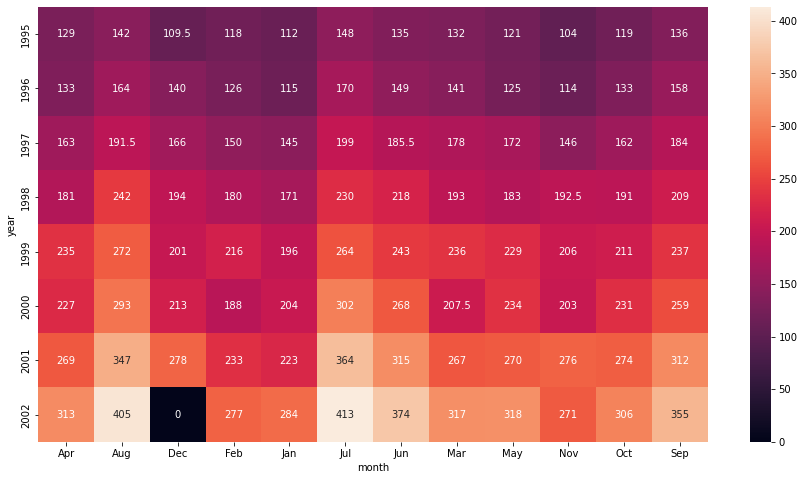

In [107]:
plt.figure(figsize=(15,8))
heatmap_y_month = pd.pivot_table(data=Airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.show()

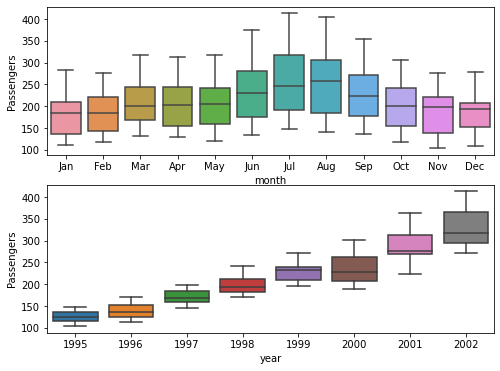

In [108]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data= Airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airlines)
plt.show()

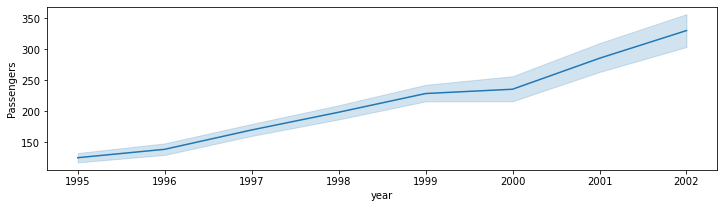

In [109]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airlines)
plt.show()

In [110]:
#splitting data

In [111]:
train = Airlines.head(81)
test = Airlines.tail(14)

In [114]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.87107195088723

In [115]:
Exp = smf.ols('log_passengers~t',data=train).fit()
pred_Exp=pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

42.37179623821829

In [116]:
Quad = smf.ols('Passengers~t+t_sq',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

42.70987042515199

In [117]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

130.55762388601406

In [118]:
add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.785371911523328

In [119]:
Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data =train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

137.28596175917107

In [120]:
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data =train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

13.188070730263249

In [121]:

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,13.188071
4,rmse_add_sea_quad,26.785372
1,rmse_Exp,42.371796
2,rmse_Quad,42.709870
0,rmse_linear,47.871072
3,rmse_add_sea,130.557624
5,rmse_Mult_sea,137.285962


In [122]:
#rmse_multi_add_sea will be prefered than any other in this analysis